In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, FormatStrFormatter, ScalarFormatter, LogLocator, LogFormatterSciNotation

In [ ]:
N = 10*10**3
dimensions = [1,2,3,4]
alpha_g_f = 2.0
alpha_a_f = 2.0
alpha_g_v = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
alpha_a_v = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,7.0, 8.0, 9.0]

dict_props = {"N":[], "dim":[], "alpha_g":[], "alpha_a":[], "L_weight":[],"L_weight_err":[],
              "D_weight":[], "D_weight_err":[], "L_BFS":[], "L_BFS_err":[], "D_BFS":[],"D_BFS_err":[]}

for dim in dimensions:
    for alpha_g in alpha_g_v:
        path_weight = f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a_f:.2f}_alpha_g_{alpha_g:.2f}/prop"
        all_files_weight =  glob.glob(os.path.join(path_weight,"*.csv"))

        path_BFS = f"../../data/N_{N}/dim_{dim}/alpha_a_{alpha_a_f:.2f}_alpha_g_{alpha_g:.2f}/properties_set.txt"
        df_BFS = pd.read_csv(path_BFS, sep=' ')

        # Number of samples in navigation with coast
        N_s_weight = len(all_files_weight)

        L_BFS, L_b_err = df_BFS["#short_path"][0:N_s_weight].mean(), df_BFS["#short_path"][0:N_s_weight].sem()
        D_BFS, D_b_err = df_BFS["#diamater"][0:N_s_weight].mean(), df_BFS["#diamater"][0:N_s_weight].sem()

        L_w, D_w = [], []

        for file in all_files_weight:
            df = pd.read_csv(file, sep=',')
            L_weight, D_weight = df["#L_weight"].values, df["#D_weight"].values

            L_w.append(float(L_weight[0]))
            D_w.append(int(D_weight[0]))

        df_WEIGHT = pd.DataFrame(data={"L_weight":L_w, "D_weidth":D_w}) 
        L_WEIGTH, L_w_err = df_WEIGHT["L_weight"][0:N_s_weight].mean(), df_WEIGHT["L_weight"][0:N_s_weight].sem()
        D_WEIGTH, D_w_err = df_WEIGHT["D_weidth"][0:N_s_weight].mean(), df_WEIGHT["D_weidth"][0:N_s_weight].sem()

        dict_props["N"].append(N)
        dict_props["dim"].append(dim)
        dict_props["alpha_a"].append(alpha_a_f)
        dict_props["alpha_g"].append(alpha_g)

        dict_props["L_weight"].append(L_WEIGTH)
        dict_props["L_weight_err"].append(L_w_err)
        dict_props["D_weight"].append(D_WEIGTH)
        dict_props["D_weight_err"].append(D_w_err)

        dict_props["L_BFS"].append(L_BFS)
        dict_props["L_BFS_err"].append(L_b_err)
        dict_props["D_BFS"].append(D_BFS)
        dict_props["D_BFS_err"].append(D_b_err)

for dim in dimensions:
    for alpha_a in alpha_a_v:
        path_weight = f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a:.2f}_alpha_g_{alpha_g_f:.2f}/prop"
        all_files_weight =  glob.glob(os.path.join(path_weight,"*.csv"))

        path_BFS = f"../../data/N_{N}/dim_{dim}/alpha_a_{alpha_a:.2f}_alpha_g_{alpha_g_f:.2f}/properties_set.txt"
        df_BFS = pd.read_csv(path_BFS, sep=' ')

        # Number of samples in navigation with coast
        N_s_weight = len(all_files_weight)

        L_BFS, L_b_err = df_BFS["#short_path"][0:N_s_weight].mean(), df_BFS["#short_path"][0:N_s_weight].sem()
        D_BFS, D_b_err = df_BFS["#diamater"][0:N_s_weight].mean(), df_BFS["#diamater"][0:N_s_weight].sem()

        L_w, D_w = [], []

        for file in all_files_weight:
            df = pd.read_csv(file, sep=',')
            L_weight, D_weight = df["#L_weight"].values, df["#D_weight"].values

            L_w.append(float(L_weight[0]))
            D_w.append(int(D_weight[0]))

        df_WEIGHT = pd.DataFrame(data={"L_weight":L_w, "D_weidth":D_w}) 
        L_WEIGTH, L_w_err = df_WEIGHT["L_weight"][0:N_s_weight].mean(), df_WEIGHT["L_weight"][0:N_s_weight].sem()
        D_WEIGTH, D_w_err = df_WEIGHT["D_weidth"][0:N_s_weight].mean(), df_WEIGHT["D_weidth"][0:N_s_weight].sem()

        dict_props["N"].append(N)
        dict_props["dim"].append(dim)
        dict_props["alpha_a"].append(alpha_a)
        dict_props["alpha_g"].append(alpha_g_f)

        dict_props["L_weight"].append(L_WEIGTH)
        dict_props["L_weight_err"].append(L_w_err)
        dict_props["D_weight"].append(D_WEIGTH)
        dict_props["D_weight_err"].append(D_w_err)

        dict_props["L_BFS"].append(L_BFS)
        dict_props["L_BFS_err"].append(L_b_err)
        dict_props["D_BFS"].append(D_BFS)
        dict_props["D_BFS_err"].append(D_b_err)

# Saving parameters
parms = {k: dict_props[k] for k in ["N", "dim", "alpha_a", "alpha_g"]}
df_parms = pd.DataFrame(data=parms)
df_parms.to_csv("../../scripts/python/parameters.csv", sep=",", index=False)


df_final = pd.DataFrame(data=dict_props)
df_final

,N,dim,alpha_g,alpha_a,L_weight,L_weight_err,D_weight,D_weight_err,L_BFS,L_BFS_err,D_BFS,D_BFS_err
0,10000,1,1.0,2.0,71.719880,25.481163,118548.657143,82238.276208,14.839638,0.425835,36.653846,1.124472
1,10000,1,2.0,2.0,4.588445,0.163183,252.555556,27.548844,13.771358,0.151841,33.555556,0.461957
2,10000,1,3.0,2.0,3.204553,0.089943,47.400000,2.168220,13.929823,0.170613,33.571429,0.510866
3,10000,1,4.0,2.0,2.442573,0.074798,23.857143,0.779078,14.739735,0.278033,35.230769,0.843633
4,10000,1,5.0,2.0,2.064828,0.060279,15.371429,0.445492,14.374485,0.164409,35.307692,0.573167
...,...,...,...,...,...,...,...,...,...,...,...,...
71,10000,4,2.0,5.0,10.395377,0.388895,187.384615,25.028583,11.164654,0.270466,27.769231,0.579056
72,10000,4,2.0,6.0,10.050554,0.299893,295.714286,54.161686,11.724407,0.156070,29.071429,0.450449
73,10000,4,2.0,7.0,10.163479,0.286554,269.928571,30.323433,12.281379,0.198522,30.714286,0.450013
74,10000,4,2.0,8.0,9.751921,0.316334,214.857143,24.934608,12.627357,0.154927,30.928571,0.666830


In [73]:
#"L_weight" L_weight_err
df_dd = df_final[(df_final["alpha_g"] == 2.0) & (df_final["dim"] == 1.0)]
for i, j, k in zip(df_dd["L_weight"], df_dd["L_weight_err"],df_dd["alpha_a"]):
    err_ = (j/i)*100
    print(f"error = {err_} to α_a = {k}")

error = 4.15290818962847 to α_a = 2.0
error = 21.68838138034076 to α_a = 0.0
error = 18.649879478284966 to α_a = 1.0
error = 4.15290818962847 to α_a = 2.0
error = 6.229513684873842 to α_a = 3.0
error = 2.672431801638409 to α_a = 4.0
error = 10.871959858299146 to α_a = 5.0
error = 11.142550547191913 to α_a = 6.0
error = 4.406180517044983 to α_a = 7.0
error = 3.473718937500938 to α_a = 8.0
error = 3.253843733837098 to α_a = 9.0


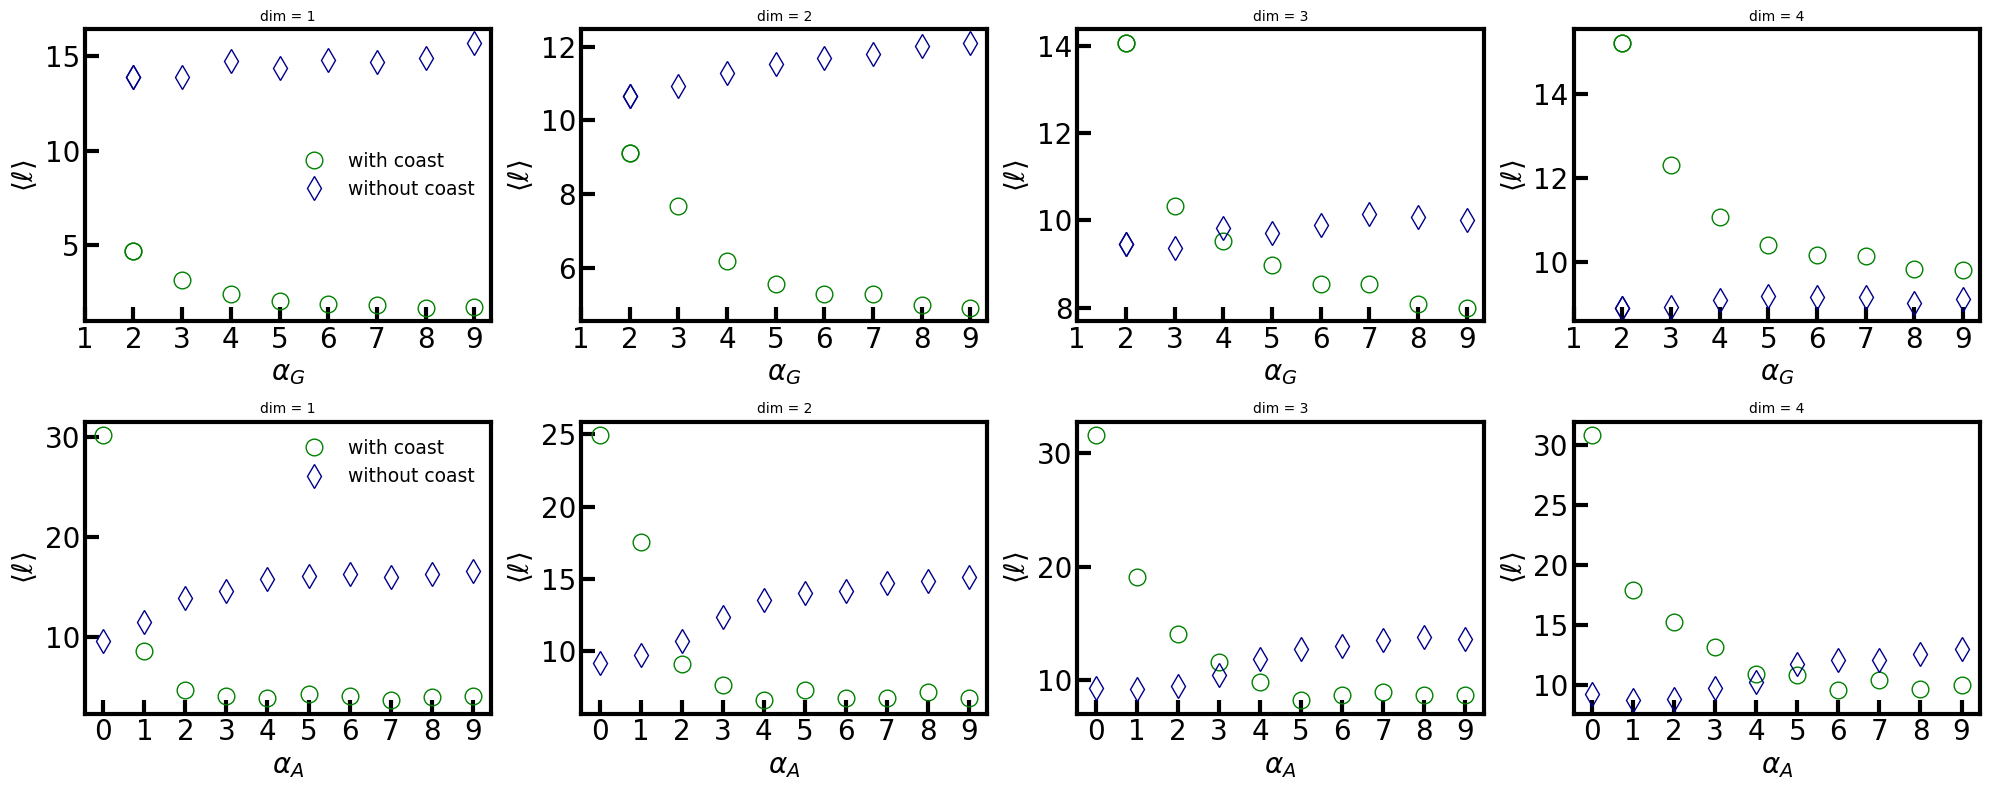

In [70]:
import matplotlib.pyplot as plt
import numpy as np

markers = ["o", "d", "^", "s", "D"]
color = ['#008000', "#00008B", "magenta", "darkgoldenrod"]

di = [1, 2, 3, 4]
fig, ax = plt.subplots(2, 4, figsize=(20, 8))
font_title = 10
markersize = 12
fonts_size = 45
label_tick_size = 20
thickness_axes = 3.0
mew = 3.0

# Linha de cima: fixo alpha_a = 2.0, variando alpha_g
for i, dim in enumerate(di):
    df = df_final[(df_final["dim"] == dim) & (df_final["alpha_a"] == 2.0)]
    ax[0, i].plot(df["alpha_g"][1:], df["L_weight"][1:], 'o', markerfacecolor='none', markersize=markersize, label='with coast', color='#008000')
    ax[0, i].plot(df["alpha_g"][1:], df["L_BFS"][1:], 'd', markerfacecolor='none', markersize=markersize, label='without coast', color="#00008B")
    ax[0, i].set_title(f"dim = {dim}", fontsize=font_title)
    ax[0, i].set_xlabel(r'$\alpha_G$', fontsize=label_tick_size)
    ax[0, i].set_ylabel(r'$\langle \ell \rangle$', fontsize=label_tick_size)

    # Ticks com espaçamento 1
    min_x, max_x = df["alpha_g"].min(), df["alpha_g"].max()
    ax[0, i].set_xticks(np.arange(np.floor(min_x), np.ceil(max_x)+1, 1))

    if i == 0:
        ax[0, i].legend(fontsize=0.3*fonts_size, frameon=0.0)
    for spine in ax[0, i].spines.values():
        spine.set_linewidth(thickness_axes)
    ax[0, i].tick_params(axis='both', which='major', direction='in', length=10, width=thickness_axes, colors='black')
    ax[0, i].tick_params(axis='both', which='minor', direction='in', length=3, width=thickness_axes, colors='black')
    ax[0, i].tick_params('both', labelsize=label_tick_size)

# Linha de baixo: fixo alpha_g = 2.0, variando alpha_a
for i, dim in enumerate(di):
    df = df_final[(df_final["dim"] == dim) & (df_final["alpha_g"] == 2.0)]
    ax[1, i].plot(df["alpha_a"][1:], df["L_weight"][1:], 'o', markerfacecolor='none', markersize=markersize, label='with coast', color='#008000')
    ax[1, i].plot(df["alpha_a"][1:], df["L_BFS"][1:], 'd', markerfacecolor='none', markersize=markersize, label='without coast', color="#00008B")
    ax[1, i].set_title(f"dim = {dim}", fontsize=font_title)
    ax[1, i].set_xlabel(r'$\alpha_A$', fontsize=label_tick_size)
    ax[1, i].set_ylabel(r'$\langle \ell \rangle$', fontsize=label_tick_size)

    # Ticks com espaçamento 1
    min_x, max_x = df["alpha_a"].min(), df["alpha_a"].max()
    ax[1, i].set_xticks(np.arange(np.floor(min_x), np.ceil(max_x)+1, 1))

    if i == 0:
        ax[1, i].legend(fontsize=0.3*fonts_size, frameon=0.0)
    for spine in ax[1, i].spines.values():
        spine.set_linewidth(thickness_axes)
    ax[1, i].tick_params(axis='both', which='major', direction='in', length=10, width=thickness_axes, colors='black')
    ax[1, i].tick_params(axis='both', which='minor', direction='in', length=3, width=thickness_axes, colors='black')
    ax[1, i].tick_params('both', labelsize=label_tick_size)

plt.tight_layout()
plt.savefig("L_vs_alpha_a_g_por_dim.pdf")
plt.show()